In [1]:
#enables charting in Jupyter
%matplotlib inline

# Getting Started

Welcome to your first 10 minutes with Pyrugga. In this tutorial you will learn how to convert a Superscout XML into a Match object and start some basic analyse a game of Rugby. 

The first step is to import Pyrugga library. This is as simple us typing 

In [2]:
import pyrugga as pyr
import matplotlib.pyplot as plt

Pyrugga requires a Super Scout file from Opta. These are stored in an XML format which is not great for statistical analysis, but useful for other things. We need to convert the XML format into something a little more friendly, a Pandas Dataframes.

In [3]:
df = pyr.Match('2961_RSAFvNEWZ_advanced_superscout.xml')

A Match object contains a number of functions and Dataframes to help us analyse a match 

**Dataframes**

* summary -- Summary of the match 
* events -- Description of each action 
* timeline -- A timeline of the match with periods ending when either possession of the ball changes or there was a stopage in play 
* players -- A list of players on each team with the positions they played and length of time on the pitch

**Functions**


* getTerritoryY -- amount of time each team spent in a zone (breadth of the pitch)
* getTerritoryX -- amount of time each team spent in a zone (length of the pitch)
* getTerritory -- amount of time each team spent in a zone (both breadth & length of the pitch)
* heatmap -- generates a heatmap for both teams filted by event 
* player_summary -- generates a summary of all players actions with the option to normilise base on : minutes played, phases or number of actions


to view the summary  line of a match

In [4]:
df.summary

,fixture_code,ref_id,ref_name,fixture_date,fx_week,awayteam,hometeam,home_score,away_score
0,2961,1000398,Matthew Carley,02/10/2021,6,New Zealand,South Africa,31,29


to create a variable containing hometeam 

In [5]:
hometeam = df.summary.hometeam[0]

to access the first 10 events of a match 

In [6]:
df.events.head(10)

,action_id,additional,advantage,description,event,event_type,fixture_code,home_team_advantage,match_time,metres,...,ps_endstamp,ps_timestamp,set_num,shirt_no,team_name,x_coord,x_coord_end,y_coord,y_coord_end,points
0,0,NaN,0,NaN,Period,Start Period,2961.0,0,1,0,...,0,0,0,0.0,South Africa,50,0,34,0,0
0,1,NaN,0,Restart Long,Restart,50m Restart Kick,2961.0,0,1,0,...,0,0,0,10.0,South Africa,50,84,34,60,0
71,2,NaN,0,NaN,Collection,Restart Catch,2961.0,0,5,0,...,3,3,1,11.0,New Zealand,16,0,8,0,0
1755,3,Ineffective Tackle Contact,0,NaN,Tackle,Chase Tackle,2961.0,0,6,0,...,4,4,1,14.0,South Africa,81,0,56,0,0
1716,4,NaN,0,NaN,Missed Tackle,Bumped Off,2961.0,0,6,0,...,4,4,1,14.0,South Africa,81,0,56,0,0
1619,5,NaN,0,NaN,Attacking Qualities,Defender Beaten,2961.0,0,6,0,...,5,5,1,11.0,New Zealand,20,0,12,0,0
450,6,NaN,0,NaN,Defensive Exits,Turnover,2961.0,0,6,0,...,5,5,1,0.0,New Zealand,21,0,12,0,0
451,6,NaN,0,NaN,Defensive Exits,OOA Entry 5th Entry- Def,2961.0,0,6,0,...,5,5,1,0.0,New Zealand,21,0,12,0,0
1427,7,Neutral Contact,0,Failed Gainline,Carry,Restart Return,2961.0,0,7,6,...,6,6,1,11.0,New Zealand,16,22,8,11,0
1761,8,Neutral Tackle Contact,0,NaN,Tackle,Chase Tackle,2961.0,0,7,0,...,5,5,1,1.0,South Africa,79,0,56,0,0


to see first 10 events for just the home team 

In [7]:
df.timeline.query('team_name == "%s"' % hometeam).head(10)

,period,set_num,team_name,points,x_coord,x_coord_end,y_coord,y_coord_end,meters_gained,dist_traveled,...,fly_half_defensive,left_wing_defensive,inside_centre_defensive,outside_centre_defensive,right_wing_defensive,full_back_defensive,New Zealand,South Africa,New Zealand_points,South Africa_points
1,1,2,South Africa,0,57,75,52,5,19,50.328918,...,0,1,0,0,0,0,0.0,0.0,0.0,0.0
3,1,4,South Africa,0,38,86,55,62,49,48.507731,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
5,1,6,South Africa,0,48,64,68,7,16,63.063460,...,0,0,1,1,0,0,0.0,0.0,0.0,0.0
6,1,7,South Africa,0,64,70,68,21,6,47.381431,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
8,1,9,South Africa,5,87,102,53,64,15,18.601075,...,0,1,0,0,0,0,0.0,5.0,0.0,5.0
11,1,12,South Africa,3,61,84,51,14,23,43.566042,...,0,1,1,2,0,0,3.0,8.0,0.0,3.0
14,1,15,South Africa,0,57,82,55,61,25,25.709920,...,0,0,0,0,0,0,8.0,8.0,0.0,0.0
17,1,18,South Africa,0,69,69,68,47,0,21.000000,...,1,0,0,0,0,0,8.0,8.0,0.0,0.0
19,1,20,South Africa,0,35,90,13,0,54,56.515485,...,0,0,2,0,2,0,8.0,8.0,0.0,0.0
20,1,21,South Africa,0,90,100,5,32,10,28.792360,...,1,0,0,0,0,0,8.0,8.0,0.0,0.0


To view all players in the match and the time they have played

In [8]:
df.players

,fixture_code,team_id,player_id,team_name,players_name,min,shirt_no,position
0,2961,900,23371,South Africa,Ox Nche,38,1,1
1,2961,900,18901,South Africa,Bongi Mbonambi,38,2,2
2,2961,900,19115,South Africa,Trevor Nyakane,38,3,3
3,2961,900,18903,South Africa,Eben Etzebeth,74,4,4
4,2961,900,20524,South Africa,Lood de Jager,57,5,5
5,2961,900,17107,South Africa,Siya Kolisi,56,6,6
6,2961,900,20655,South Africa,Kwagga Smith,80,7,7
7,2961,900,8986,South Africa,Duane Vermeulen,80,8,8
8,2961,900,21626,South Africa,Faf de Klerk,65,9,9
9,2961,900,19888,South Africa,Handre Pollard,80,10,10


To generate a heat map showing where both teams have kicked the ball 

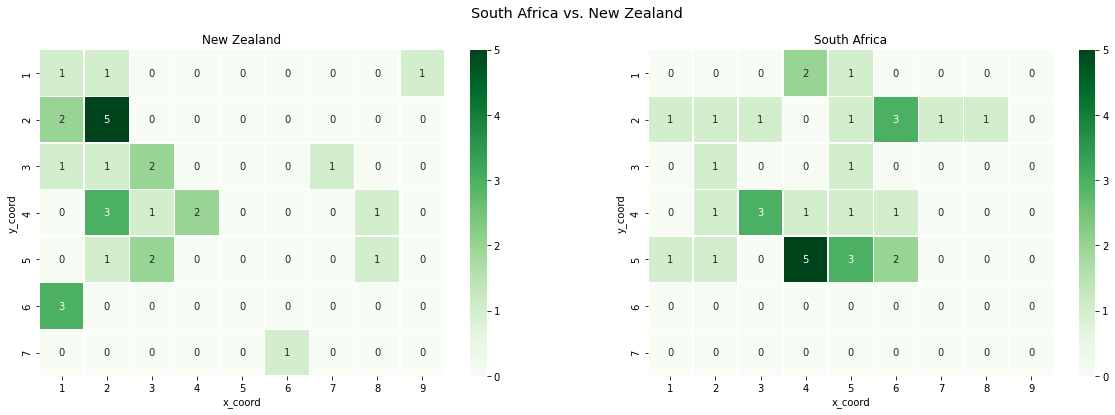

In [9]:
df.heat_map(event='Kick')

To get a summary of all players normilised by minutes on the pitch 

In [10]:
df.player_summary(norm='mins')

replacement  replaced  mins  \
team_name    position players_name                                       
New Zealand  1.0      George Bower                   1         0    22   
                      Joe Moody                      0         1    58   
             2.0      Asafo Aumua                    1         0    22   
                      Codie Taylor                   0         1    58   
             3.0      Nepo Laulala                   0         1    58   
                      Ofa Tu'ungafasi                1         0    22   
             4.0      Brodie Retallick               0         0    80   
             5.0      Patrick Tuipulotu              1         0    40   
                      Scott Barrett                  0         1    40   
             6.0      Akira Ioane                    0         0    80   
             7.0      Ardie Savea                    0         0    80   
                      Ethan Blackadder               1         0    31   
             8.0      Luke Jacobson                  0         1    49   
             9.0      Brad Weber                     0         1    58   
                      TJ Perenara                    1         0    22   
             10.0     Beauden Barrett                0         1    65   
                      Richie Mo'unga                 1         0    15   
             11.0     Rieko Ioane                    0         0    80   
             12.0     David Havili                   0         1    65   
             13.0     Anton Lienert-Brown            0         0    80   
                      Damian McKenzie                1         0    15   
             14.0     Sevu Reece                     0         0    80   
             15.0     Jordie Barrett                 0         0    80   
South Africa 1.0      Ox Nche                        0         1    38   
                      Steven Kitshoff                1         0    42   
             2.0      Bongi Mbonambi                 0         1    38   
                      Malcolm Marx                   1         0    42   
             3.0      Trevor Nyakane                 0         1    38   
                      Vincent Koch                   1         0    42   
             4.0      Eben Etzebeth                  0         1    74   
             5.0      Franco Mostert                 1         0    29   
                      Lood de Jager                  0         1    57   
             6.0      Jasper Wiese                   1         0    24   
                      Siya Kolisi                    0         1    56   
             7.0      Kwagga Smith                   0         0    80   
             8.0      Duane Vermeulen                0         0    80   
             9.0      Faf de Klerk                   0         1    65   
                      Herschel Jantjies              1         0    15   
             10.0     Elton Jantjies                 1         0    32   
                      Handre Pollard                 0         0    80   
             11.0     Makazole Mapimpi               0         0    80   
             12.0     Damian de Allende              0         0    80   
             13.0     Lukhanyo Am                    0         0    80   
             14.0     S'busiso Nkosi                 0         1    48   
             15.0     Francois Steyn                 1         0    40   
                      Willie le Roux                 0         0    40   

                                           actions  average_phase  phases  \
team_name    position players_name                                          
New Zealand  1.0      George Bower              18       1.743590      68   
                      Joe Moody                 42       2.098039     214   
             2.0      Asafo Aumua               16       2.074074      56   
                      Codie Taylor              44       2.197917     211   
             3.0      Nepo L

Break the match up into discrete events based on when possession of the ball changed teams

In [11]:
df.timeline

,period,set_num,team_name,points,x_coord,x_coord_end,y_coord,y_coord_end,meters_gained,dist_traveled,...,fly_half_defensive,left_wing_defensive,inside_centre_defensive,outside_centre_defensive,right_wing_defensive,full_back_defensive,New Zealand,South Africa,New Zealand_points,South Africa_points
0,1,1,New Zealand,0,16,43,8,16,27,28.160256,...,0,0,0,0,1,0,0.0,0.0,0.0,0.0
1,1,2,South Africa,0,57,75,52,5,19,50.328918,...,0,1,0,0,0,0,0.0,0.0,0.0,0.0
2,1,3,New Zealand,0,25,62,63,13,37,62.201286,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,1,4,South Africa,0,38,86,55,62,49,48.507731,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,1,5,New Zealand,0,14,52,8,0,38,38.832976,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2,85,New Zealand,0,21,44,9,6,24,23.194827,...,0,0,0,0,0,0,26.0,25.0,0.0,0.0
85,2,86,South Africa,3,56,108,62,35,52,58.591808,...,0,0,0,2,0,0,26.0,28.0,0.0,3.0
86,2,87,New Zealand,3,50,64,35,17,14,22.803509,...,1,0,0,0,0,0,29.0,28.0,3.0,0.0
87,2,88,New Zealand,0,50,58,34,54,8,21.540659,...,1,0,0,0,0,0,29.0,28.0,0.0,0.0


# Your First Analysis

Now we have a handle on the basics lets try a simple analysis to how each team managed possession and territory. To count up the minutes each team had the ball we can sum the length field in the timeline grouping by team_name

In [12]:
df.timeline.groupby('team_name').sum()['length'] 

team_name
New Zealand     821
South Africa    946
Name: length, dtype: int64

If we wanted to see this in a percentage we need to sum the column which requires adding another ".sum()"

In [13]:
df.timeline.groupby('team_name').sum()['length'] / (df.timeline.groupby('team_name').sum()['length'].sum())

team_name
New Zealand     0.464629
South Africa    0.535371
Name: length, dtype: float64

to plot this add .plot

<AxesSubplot:title={'center':'Possession'}, xlabel='team_name'>

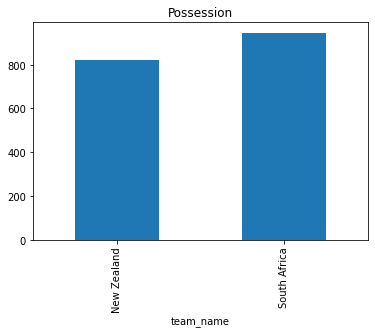

In [14]:
df.timeline.groupby('team_name').sum()['length'] \
.plot.bar(title="Possession")

So we have a pretty good read on who had the ball the most but what about where they had the ball? getTerritoryY gives us the width of play while getTerritoryX gives as the length of play

<AxesSubplot:title={'center':'Width'}, ylabel='y_coord'>

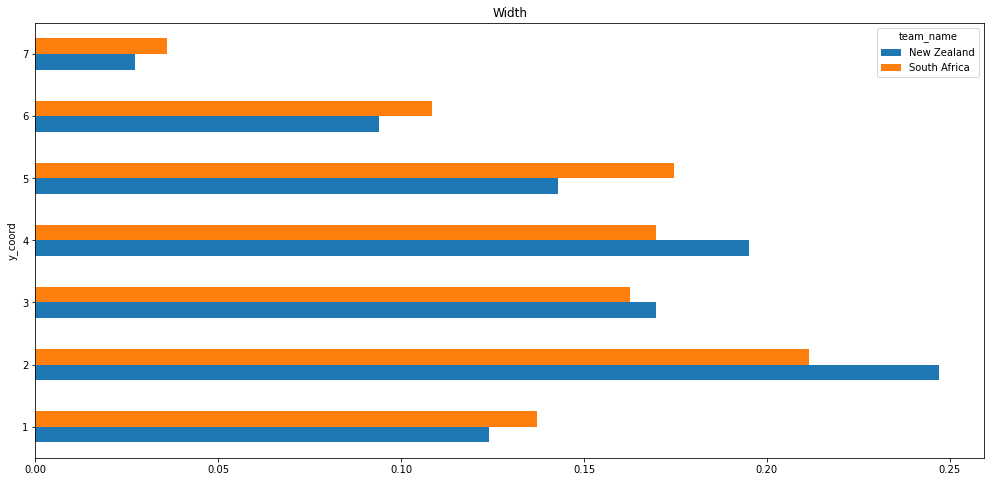

In [15]:
df.getTerritoryY(perc=True).plot(kind='barh',figsize=(17,8),title='Width')

<AxesSubplot:title={'center':'Territory'}, xlabel='x_coord'>

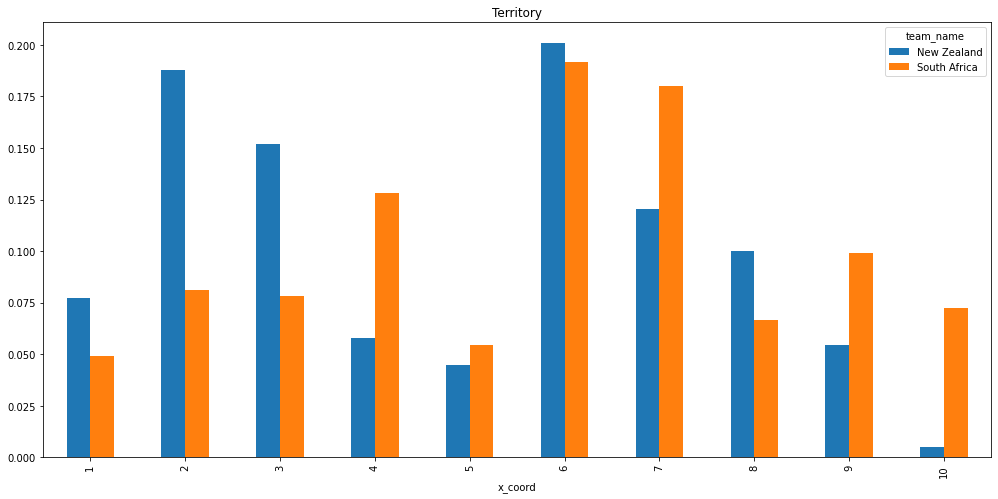

In [16]:
df.getTerritoryX(perc=True).plot(kind='bar',figsize=(17,8),title='Territory')

Heatmaps are also useful for seeing where events or actions occured in match. For example if we want to see where attachking sequences began for each team.

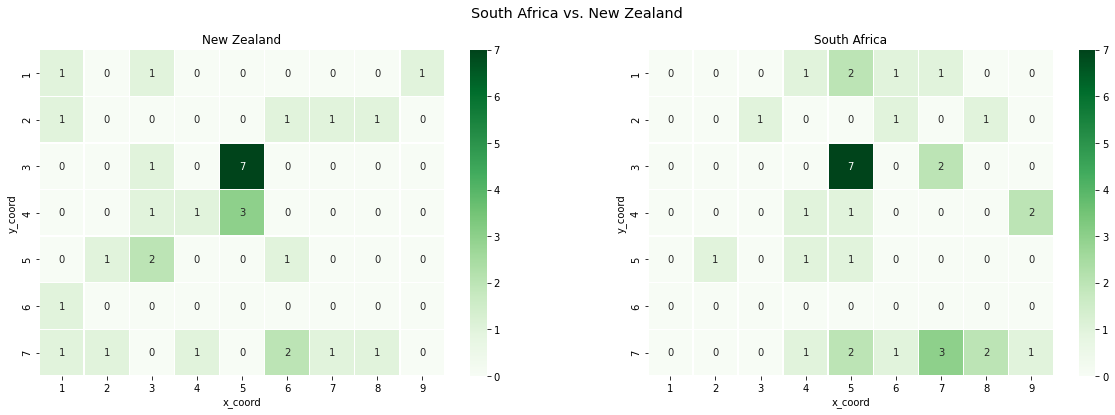

In [17]:
df.heat_map(event='Sequence')

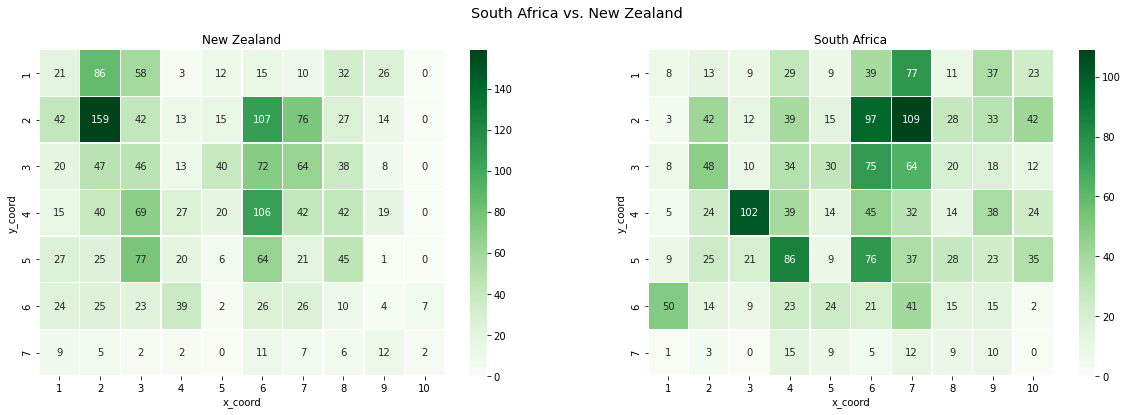

In [18]:
df.heat_map()

If we want a summary metric that measures which team had the most control of territory we can use getTerritoryMetric

array([<AxesSubplot:ylabel='territory'>], dtype=object)

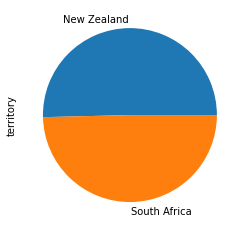

In [19]:
df.getTerritoryMetric().set_index('team_name').plot(kind='pie',subplots=True,legend=False)